In [94]:
import numpy as np
import skimage
from skimage import data
from skimage import io
from skimage.transform import resize
from matplotlib.pyplot import imshow
from skimage.color import rgb2gray
from scipy import misc
from scipy import ndimage

In [95]:
fish = io.imread("./sampleTrain/DOL/img_05420.jpg")
fish = ndimage.gaussian_filter(fish, sigma=3)
fish = resize(fish, (320, 320), mode='reflect')
image = rgb2gray(fish)


In [96]:
import matplotlib
import matplotlib.pyplot as plt
plt.show(image.all)

In [97]:
#io.imsave('fishy.jpg', fish)

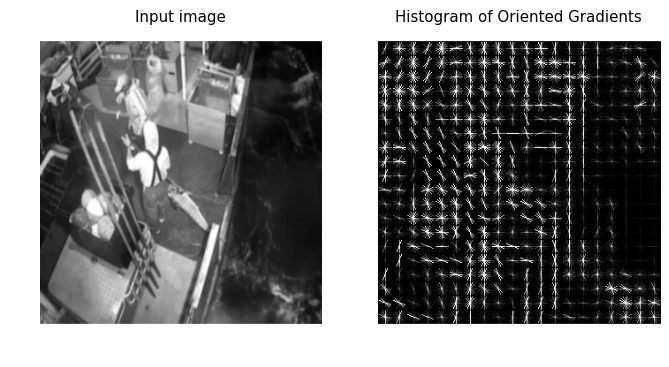

In [99]:
from skimage.feature import hog
from skimage import data, color, exposure



fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualise=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax1.set_adjustable('box-forced')
plt.show()

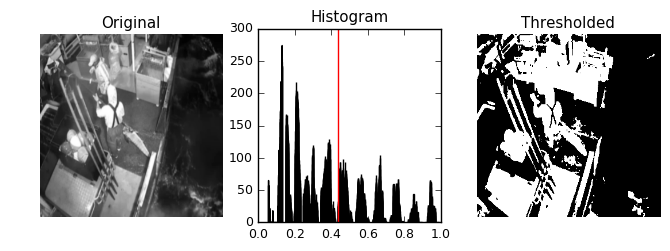

In [100]:
import matplotlib
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import threshold_otsu


matplotlib.rcParams['font.size'] = 9


thresh = threshold_otsu(image)
binary = image > thresh

#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2.5))
fig = plt.figure(figsize=(8, 2.5))
ax1 = plt.subplot(1, 3, 1, adjustable='box-forced')
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1, adjustable='box-forced')

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.axis('off')

ax2.hist(image)
ax2.set_title('Histogram')
ax2.axvline(thresh, color='r')

ax3.imshow(binary, cmap=plt.cm.gray)
ax3.set_title('Thresholded')
ax3.axis('off')

plt.show()

ValueError: Images of type float must be between -1 and 1.